In [408]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [409]:
def derivative(x,y):
    d = []
    for i in range(len(y)-1):
        d.append((y[i+1]-y[i])/(2*x[i+1]-x[i]))
    return np.array(d)

def double_exponential_signal(t, A, a, b):
    return A * (np.exp(-a * t) - np.exp(-b * t))

# Function to generate combined high and low-frequency noise
def combined_noise(t, low_freq, high_freq, low_ampl, high_ampl):
    low_freq_noise = low_ampl * np.sin(2 * np.pi * low_freq * t)
    high_freq_noise = high_ampl * np.sin(2 * np.pi * high_freq * t)
    return low_freq_noise + high_freq_noise

In [500]:
# Parameters for the double exponential signals
A = 1.0
a = 0.5
b = 0.1
signal_duration = 30  # each signal lasts 10 micro-seconds
num_signals = 20  # total number of signals
samples_per_second = 250  # sampling rate
max_delay_duration = 30  # maximum duration of delay with background noise in seconds


concatenated_signal = np.array([])
t = np.array([])


# Noise parameters
low_freq = 0.1  # Low frequency component
high_freq = 5.0  # High frequency component
low_ampl = 0.5  # Amplitude of the low frequency noise
high_ampl = 0.1  # Amplitude of the high frequency noise
background_noise_std = 0.1  # Standard deviation of the Gaussian noise

In [501]:
# Concatenate multiple double exponential signals
for i in range(num_signals):
    t_single = np.linspace(0, signal_duration, signal_duration * samples_per_second)
    clean_signal = double_exponential_signal(t_single, A, a, b)
    composite_noise = combined_noise(t_single, low_freq, high_freq, low_ampl, high_ampl)
    background_noise = np.random.normal(0, background_noise_std, t_single.shape)
    noisy_signal = clean_signal + composite_noise + background_noise
    
    # Add the noisy signal to the concatenated signal
    concatenated_signal = np.concatenate((concatenated_signal, noisy_signal))
    t = np.concatenate((t, t_single + t[-1] + t_single[1])) if t.size else t_single

    # Add a random delay with background noise
    delay_duration = np.random.uniform(0, max_delay_duration)
    t_delay = np.linspace(0, delay_duration, int(delay_duration * samples_per_second))
    delay_noise = np.random.normal(0, background_noise_std, t_delay.shape)
    concatenated_signal = np.concatenate((concatenated_signal, delay_noise))
    t = np.concatenate((t, t_delay + t[-1] + t_delay[1])) if t.size else t_delay

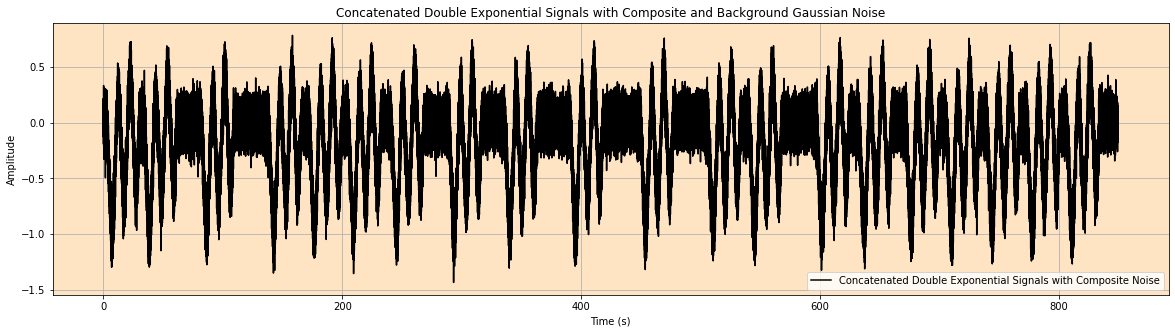

In [502]:
# Plot the concatenated signal
fig, axs = plt.subplots(1,1,figsize=(20, 5))
axs.plot(t, concatenated_signal, color='black',label='Concatenated Double Exponential Signals with Composite Noise')
axs.set_xlabel('Time (s)')
axs.set_ylabel('Amplitude')
axs.set_title('Concatenated Double Exponential Signals with Composite and Background Gaussian Noise')
axs.legend()
axs.grid()
axs.set_facecolor('bisque')

In [503]:
# Perform FFT on the concatenated signal
fft_signal = np.fft.fft(concatenated_signal)
frequencies = np.fft.fftfreq(len(concatenated_signal), 1 / samples_per_second)

In [504]:
# Apply a low-pass filter in the frequency domain
cutoff_frequency = 0.5  # Set cutoff frequency for the low-pass filter
fft_filtered_signal = fft_signal.copy()
fft_filtered_signal[np.abs(frequencies) > cutoff_frequency] = 0

# Perform inverse FFT to get the filtered signal
filtered_signal = np.fft.ifft(fft_filtered_signal)

c:\Users\kid\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


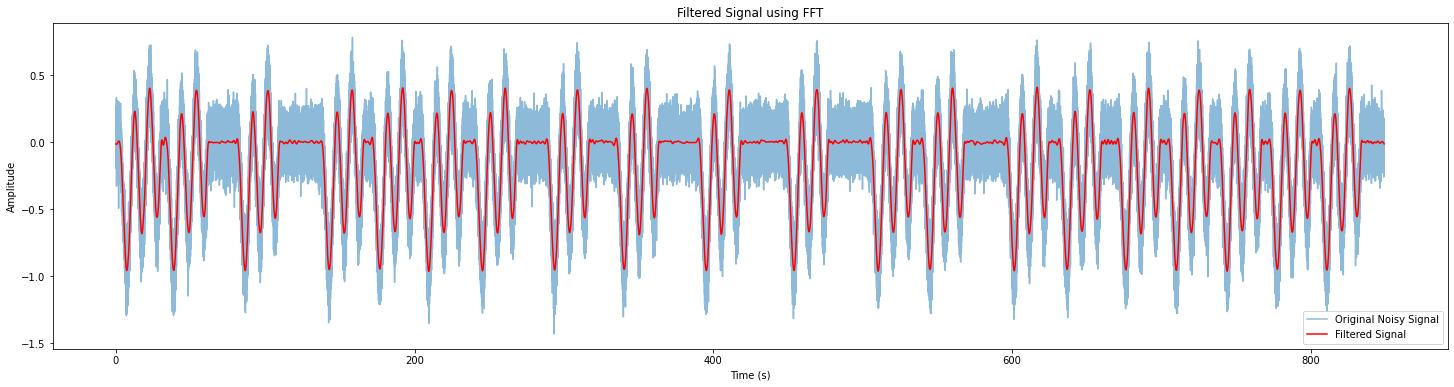

In [509]:

# Plot the filtered signal
plt.figure(figsize=(25, 6))
plt.plot(t, concatenated_signal, label='Original Noisy Signal', alpha=0.5)
plt.plot(t, filtered_signal, label='Filtered Signal', color='red',alpha=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal using FFT')
plt.legend()
plt.show()

In [506]:
d1 = derivative(t[30:],filtered_signal[30:])
d2 = derivative(t[30:-1],d1)
d2_norm = d2/max(abs(d2))

In [507]:
h = 0
peaks, props = find_peaks(-d2, -1)

c:\Users\kid\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


c:\Users\kid\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\kid\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\kid\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


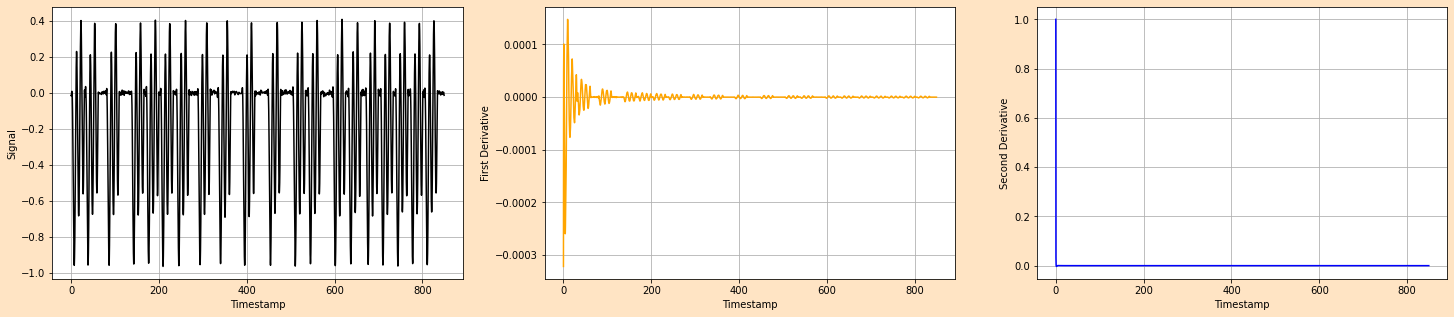

In [508]:
fig, axs = plt.subplots(1,3, figsize=(25,5))
axs[0].plot(t[30:], filtered_signal[30:], color='black' )
axs[1].plot(t[30:-1], d1, color='orange')
axs[2].plot(t[30:-2], d2_norm, color='blue')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Signal')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('First Derivative')
axs[2].set_xlabel('Timestamp')
axs[2].set_ylabel('Second Derivative')
axs[0].grid()
axs[1].grid()
axs[2].grid()
fig.set_facecolor('bisque')